# Исследование данных о играх 


***Цель***
Определить потенциально популярный продукт 

 
 ***Задача***
 
 Выявить определяющие успешность игры закономерности
 
 ***Ход исследования***
 
Интернет-магазин «Стримчик»,  продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
 
 
 ***Исследование пройдёт в три этапа:***
 1. Обзор данных.
 2. Предобработка данных.
 3. Решение задачи
 
 
***Описание данных ***
*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы проданных копий)
*	EU_sales — продажи в Европе (миллионы проданных копий)
*	JP_sales — продажи в Японии (миллионы проданных копий)
*	Other_sales — продажи в других странах (миллионы проданных копий)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Шаг 1. Изучяем общую информацию

Откроем файл с данными и изучем информацию

In [2]:
df = pd.read_csv('/datasets/games.csv', sep = ',')

In [3]:
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


***Описание данных***
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

***всего 16713  строк 
*** 11 столбцов с типами: float64(6), object(5)
*** в столбцах есть пропуски

### Шаг 2. Подготовим данные


* Приведем данные к нужным типам;
* Найдем и исправим ошибки в данных, если они есть.
* Исправим ошибки
* Замените названия столбцов (приведите к нижнему регистру)
* Обработаем пропуски при необходимости
* Опишем причины, которые могли привести к пропускам;
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. 

In [4]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [5]:
df = df.rename( 
 columns={ 
    'Name': 'name', 
    'Platform' : 'platform', 
    'Year_of_Release' : 'year_of_release', 
    'Genre' : 'genre', 
    'NA_sales' : 'na_sales', 
    'EU_sales' : 'eu_sales',
    'JP_sales' : 'jp_sales',
    'Other_sales' : 'other_sales', 
    'Critic_Score' : 'critic_score', 
    'User_Score' : 'user_score' , 
    'Rating': 'rating'
 } 
)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом в одну строчку, вот так:</font><br>
`df.columns = df.columns.str.lower()`

Удалим пропущенные значения 'year_of_release' и  'name'

In [6]:
df = df.dropna(subset=['year_of_release', 'name']) 

Заменим на тип int в столбце 'year_of_release',  так как год это целое число

In [7]:
df['year_of_release'] = df['year_of_release'].astype('int64', )

Получим сумму продаж по всем регионам

In [8]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

Так как 'tbd' в 'user_score' значит как  "неопределенное", заменим его на пустое значение. Переведем данные из типа строк в число 

In [9]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', )
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Рассмотрим столбик rating, уникальные значения и распределения 
* «EC» («Early childhood») — «Для детей младшего возраста» 
* «E» («Everyone») — «Для всех»
* «M» («Mature») — «Для взрослых»
* «E10+» («Everyone 10 and older») 
* «T» («Teen») — «Подросткам» 
* «AO» («Adults Only 18+») 
* «RP» («Rating Pending») — «Рейтинг ожидается»
* 'K-A'  старое название «E» 

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


<AxesSubplot:>

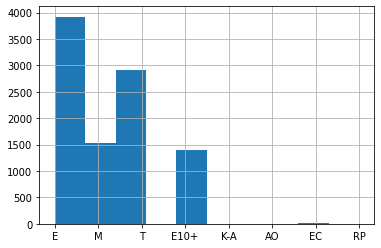

In [10]:
print(df['rating'].unique())
df['rating'].hist()

Заполним пропуски в 'rating' значением «RP» («Rating Pending») — «Рейтинг ожидается»

In [11]:
df['rating'] = df['rating'].fillna('RP')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sales            16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


* После обработки данных получили 16444 строк из 16713, потери составляют 1.6%.

* Заменили типы данных в столбцах year_of_release, critic_score, user_score. 

* Пропуски в critic_score, user_score заполнили средними значениями. 

* Rating заполнили «RP» («Rating Pending») — «Рейтинг ожидается»


In [13]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sales            16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Может лучше было бы пропуски в 'critic_score' и 'user_score' заменить на заглушку (например -1), а при анализе по отзывам просто бы фильтровали эту заглушку. Уж очень много их в нашей таблице. А ты как думаешь? 🙄</font>

### Шаг 3. Провем исследовательский анализ данных


1.	Посмотрите, сколько игр выпускалось в разные годы.


                count
                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


<AxesSubplot:>

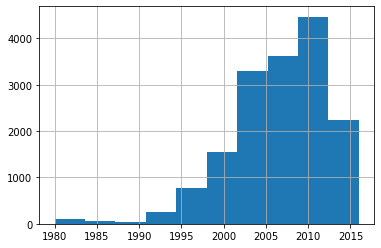

In [14]:
print(df.pivot_table(index='year_of_release', values='name', aggfunc=['count']))
df['year_of_release'].hist()

Не за все периоды важны данные, до 1995 года было мало игр

2.	Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [15]:

df_platform_sales = df.pivot_table(index='platform', values='sales', aggfunc=['sum'])
df_platform_sales.columns = ['sum_sales'] 
df_platform_sales = df_platform_sales.sort_values(by=['sum_sales'], ascending = False)
top_platform = df_platform_sales.head(18)
display(top_platform)


,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [16]:
df_top_platform = df.query('platform in @top_platform.index')

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df_top_platform_pivot = df_top_platform.pivot_table(index=['year_of_release'] ,columns =['platform'], values='sales', aggfunc=['sum'])
df_top_platform_pivot = df_top_platform_pivot.fillna(0)

In [19]:
display(df_top_platform_pivot)


sum                                                    \
platform           3DS      DS     GB    GBA     GC    N64    NES     PC   
year_of_release                                                            
1983              0.00    0.00   0.00   0.00   0.00   0.00  10.96   0.00   
1984              0.00    0.00   0.00   0.00   0.00   0.00  50.08   0.00   
1985              0.00    0.02   0.00   0.00   0.00   0.00  53.44   0.04   
1986              0.00    0.00   0.00   0.00   0.00   0.00  36.41   0.00   
1987              0.00    0.00   0.00   0.00   0.00   0.00  19.76   0.00   
1988              0.00    0.00   1.43   0.00   0.00   0.00  45.01   0.03   
1989              0.00    0.00  64.97   0.00   0.00   0.00   7.85   0.00   
1990              0.00    0.00   4.89   0.00   0.00   0.00  15.73   0.00   
1991              0.00    0.00   5.57   0.00   0.00   0.00   6.11   0.00   
1992              0.00    0.00  25.49   0.00   0.00   0.00   1.98   3.03   
1993              0.00    0.00   0.00   0.00   0.00   0.00   3.61   0.00   
1994              0.00    0.00  12.18   0.00   0.00   0.00   0.11  12.87   
1995              0.00    0.00   3.60   0.00   0.00   0.00   0.00   4.22   
1996              0.00    0.00  36.03   0.00   0.00  34.10   0.00  10.58   
1997              0.00    0.00   6.37   0.00   0.00  39.50   0.00  11.27   
1998              0.00    0.00  26.90   0.00   0.00  49.24   0.00   3.26   
1999              0.00    0.00  38.00   0.00   0.00  57.87   0.00   4.74   
2000              0.00    0.00  19.76   0.07   0.00  33.97   0.00   4.66   
2001              0.00    0.00   9.24  61.53  26.34   3.25   0.00   5.47   
2002              0.00    0.00   0.00  74.16  51.81   0.08   0.00   8.57   
2003              0.00    0.00   0.00  56.67  50.61   0.00   0.00   8.84   
2004              0.00   17.27   0.00  77.91  28.82   0.00   0.00  10.39   
2005              0.00  130.14   0.00  33.86  27.62   0.00   0.00   4.37   
2006              0.00  119.81   0.00   5.28  11.26   0.00   0.00   2.85   
2007              0.00  146.94   0.00   3.40   0.27   0.00   0.00   9.28   
2008              0.00  145.31   0.00   0.00   0.00   0.00   0.00  12.42   
2009              0.00  119.54   0.00   0.00   0.00   0.00   0.00  16.91   
2010              0.00   85.02   0.00   0.00   0.00   0.00   0.00  24.28   
2011             63.20   26.18   0.00   0.00   0.00   0.00   0.00  35.03   
2012             51.36   11.01   0.00   0.00   0.00   0.00   0.00  23.22   
2013             56.57    1.54   0.00   0.00   0.00   0.00   0.00  12.38   
2014             43.76    0.00   0.00   0.00   0.00   0.00   0.00  13.28   
2015             27.78    0.00   0.00   0.00   0.00   0.00   0.00   8.52   
2016             15.14    0.00   0.00   0.00   0.00   0.00   0.00   5.25   

                                                                               \
platform             PS     PS2     PS3     PS4    PSP   SNES     Wii    X360   
year_of_release                                                                 
1983               0.00    0.00    0.00    0.00   0.00   0.00    0.00    0.00   
1984               0.00    0.00    0.00    0.00   0.00   0.00    0.00    0.00   
1985               0.00    0.00    0.00    0.00   0.00   0.00    0.00    0.00   
1986               0.00    0.00    0.00    0.00   0.00   0.00    0.00    0.00   
1987               0.00    0.00    0.00    0.00   0.00   0.00    0.00    0.00   
1988               0.00    0.00    0.00    0.00   0.00   0.00    0.00    0.00   
1989               0.00    0.00    0.00    0.00   0.00   0.00    0.00    0.00   
1990               0.00    0.00    0.00    0.00   0.00  26.15    0.00    0.00   
1991               0.00    0.00    0.00    0.00   0.00  16.22    0.00    0.00   
1992               0.00    0.00    0.00    0.00   0.00  32.98    0.00    0.00   
1993               0.00    0.00    0.00    0.00   0.00  40.02    0.00    0.00   
1994               6.03    0.00    0.00    0.00   0.00  35.08    0.00   

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

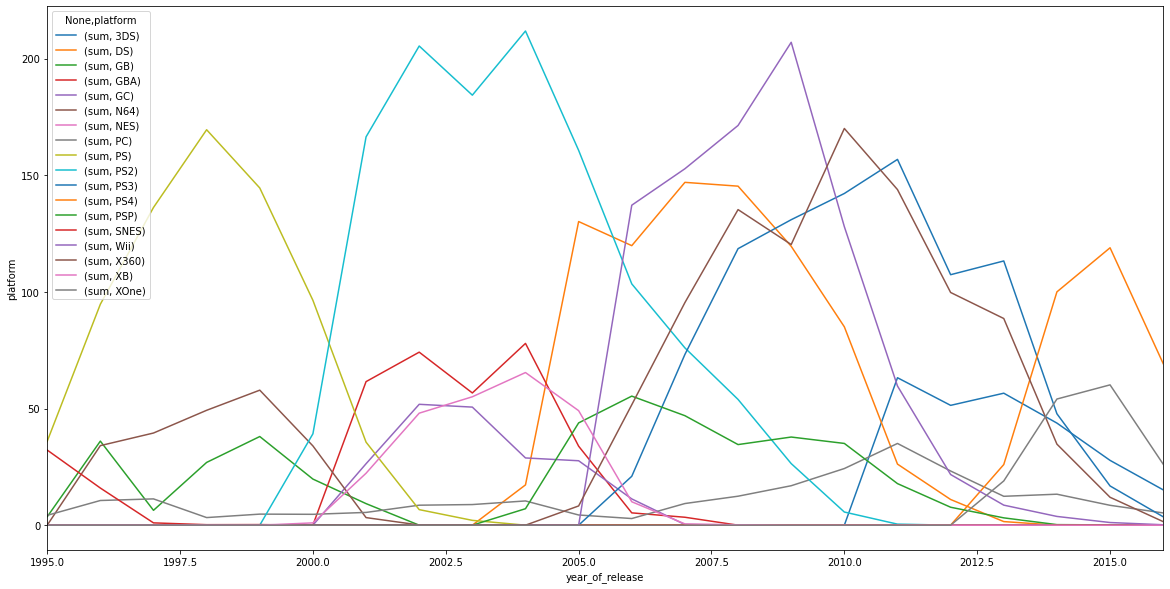

In [20]:
df_top_platform_pivot.plot(figsize = (20, 10), xlim=(1995, 2016), ylabel = 'platform')

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

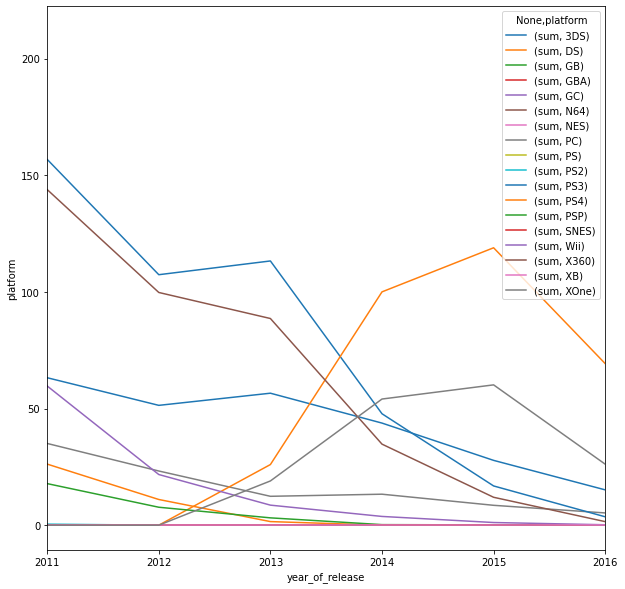

In [21]:
df_top_platform_pivot.plot(figsize = (10, 10), xlim=(2011, 2016),  ylabel = 'platform')

За примерно за 10-15 лет появляются новые и исчезают старые платформы

Заметим, что в рост пошли  2 платформы с 2012 года. 
А также с 2012 годы  платформы переходят в среднем из состояния пика популярности к полному спаду.

*** Возьмем данные с 2012 по 2015, 2016 не берем, так как он  не полный по условию  

Построим по актуальным годам продажи игр популярных платформ

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Учтено!</b></font>

,sum
,sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
PC,62.65
Wii,35.37
DS,12.55


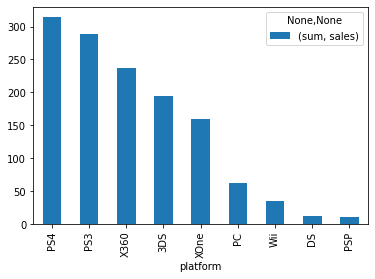

In [22]:
year = np.linspace(2012,2016,5)
df_top_platform_year = df_top_platform.query('year_of_release in @year')
df_top_platform_year.pivot_table(
    index= ['platform'], values='sales', 
    aggfunc=['sum']).sort_values(by=('sum', 'sales'), ascending = False).plot(kind="bar")
    
display(df_top_platform_year.pivot_table(
    index= ['platform'], values='sales', aggfunc=['sum'])
    .sort_values(by=('sum', 'sales'), ascending = False)
)

Лидируют по продажам 'PS3', 'PS4', 'X360', '3DS', 'XOne', 'PC' 

С 2012 по 2016 платформы PS4  и XOne начинают рост, остальные падают. 


Рассморим лидирующие платформы  с 2012 по 2016

In [23]:
year = np.linspace(2012,2016,5)
platform_trend = ['PS3', 'PS4', 'X360', '3DS', 'XOne', 'PC']
df_platform_trend = df_top_platform.query('year_of_release in @year')
df_platform_trend = df_platform_trend.query('platform in @platform_trend') 


In [24]:
df_X360 = df_platform_trend.query('platform == "X360"')
df_PS3 = df_platform_trend.query('platform == "PS3"')
df_3DS = df_platform_trend.query('platform == "3DS"')
df_PS4 = df_platform_trend.query('platform == "PS4"')
df_XOne =df_platform_trend.query('platform == "XOne"')
df_PC =df_platform_trend.query('platform == "PC"')


* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [25]:
def box_plot(data):
    print(data['platform'].unique())
    data.boxplot(column='sales')
    plt.ylim(0, 3)
    plt.show()  


for i in   [df_X360 , df_PS3 ,  df_3DS , df_PS4 , df_XOne, df_PC]:
    box_plot(i)

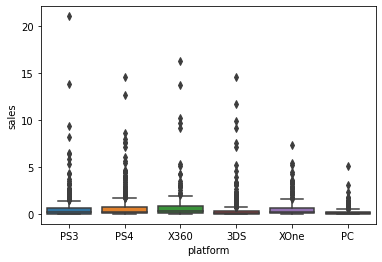

In [26]:
sns.boxplot(data=df_platform_trend, x='platform', y='sales', order=['PS3', 'PS4', 'X360', '3DS', 'XOne', 'PC'])
plt.show() 


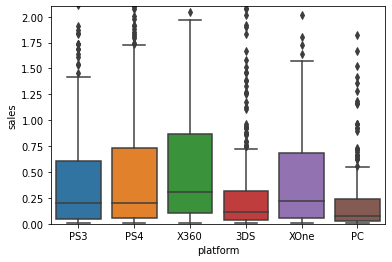

In [27]:

sns.boxplot(data=df_platform_trend, x='platform', y='sales', order=['PS3', 'PS4', 'X360', '3DS', 'XOne', 'PC'])
plt.ylim(0, 2.1)
plt.show() 

 Опишите результат.
У  'PS4' и  'XOne' выбросы начинаются после значения в 2.5 миллиона продаж, в отличии от других платформ, где выбросами считается продажы примерно от 0,7

Это значит, что продаж для каждой игры 'PS4' и  'XOne' в среднем гораздо больше, чем на других платформах.  


***Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постром диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами***

In [28]:
def scatter_plot_critic(data):
    print('scatter_plot_critic',data['platform'].unique())
    data.plot(x='critic_score', y='sales', kind='scatter')
    plt.show()

In [29]:
def scatter_plot_user(data):
    print('scatter_plot_user', data['platform'].unique())
    data.plot(x='user_score', y='sales', kind='scatter')
    plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Свои функции для выполнения повторяющихся операций - это короткий код и показатель профессионализма. Мы профи! 😄</font>

scatter_plot_critic ['PS4']


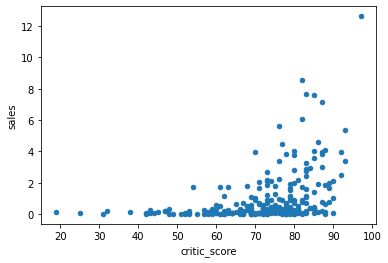

scatter_plot_user ['PS4']


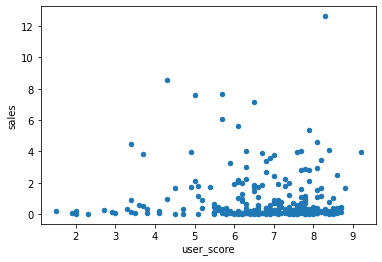

user_score -0.031957110204556424
critic_score 0.40656790206178095


In [30]:
scatter_plot_critic(df_PS4)
scatter_plot_user(df_PS4)
print('user_score', df_PS4['user_score'].corr(df_PS4['sales']))
print('critic_score', df_PS4['critic_score'].corr(df_PS4['sales']))

scatter_plot_critic ['PC']


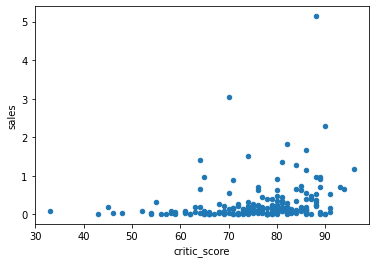

scatter_plot_user ['PC']


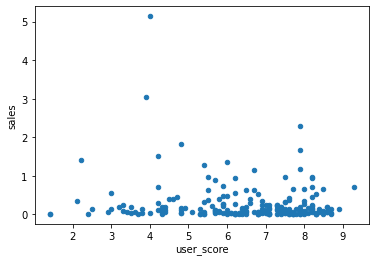

user_score -0.12186747630735577
critic_score 0.23724324311567915


In [31]:
scatter_plot_critic(df_PC)
scatter_plot_user(df_PC)
print('user_score', df_PC['user_score'].corr(df_PC['sales']))
print('critic_score', df_PC['critic_score'].corr(df_PC['sales']))

scatter_plot_critic ['XOne']


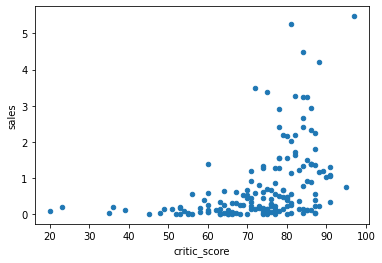

scatter_plot_user ['XOne']


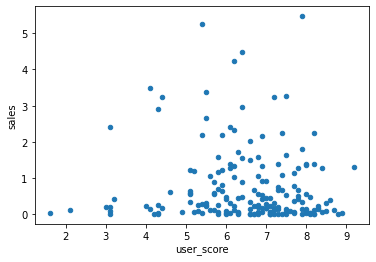

user_score -0.06892505328279414
critic_score 0.4169983280084017


In [32]:
scatter_plot_critic(df_XOne)
scatter_plot_user(df_XOne)
print('user_score', df_XOne['user_score'].corr(df_XOne['sales']))
print('critic_score', df_XOne['critic_score'].corr(df_XOne['sales']))

scatter_plot_critic ['X360']


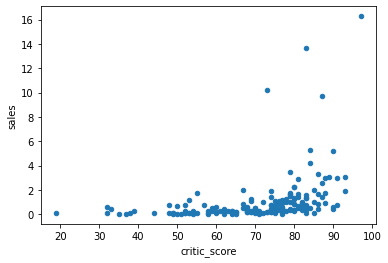

scatter_plot_user ['X360']


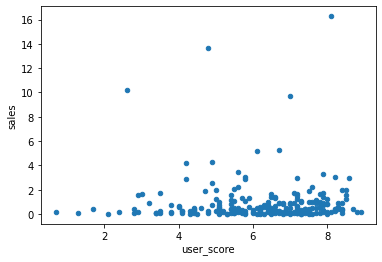

user_score 0.006163978646213326
critic_score 0.3605734888507336


In [33]:
scatter_plot_critic(df_X360)
scatter_plot_user(df_X360)
print('user_score', df_X360['user_score'].corr(df_X360['sales']))
print('critic_score', df_X360['critic_score'].corr(df_X360['sales']))

scatter_plot_critic ['PS3']


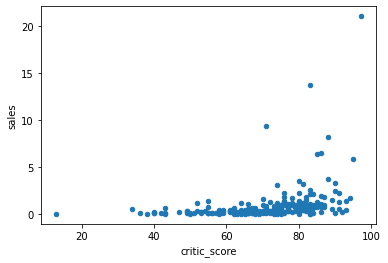

scatter_plot_user ['PS3']


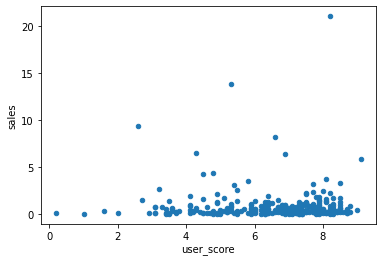

user_score -0.005143522887113815
critic_score 0.3314972592629587


In [34]:
scatter_plot_critic(df_PS3)
scatter_plot_user(df_PS3)
print('user_score', df_PS3['user_score'].corr(df_PS3['sales']))
print('critic_score', df_PS3['critic_score'].corr(df_PS3['sales']))

scatter_plot_critic ['3DS']


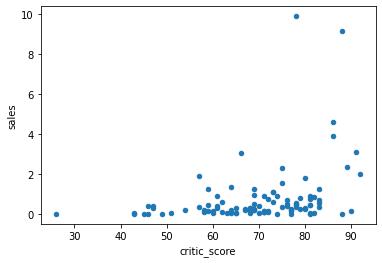

scatter_plot_user ['3DS']


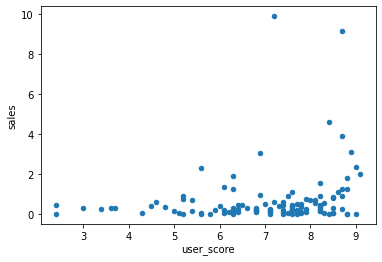

user_score 0.19758263411038599
critic_score 0.3208028695360785


In [35]:
scatter_plot_critic(df_3DS)
scatter_plot_user(df_3DS)
print('user_score', df_3DS['user_score'].corr(df_3DS['sales']))
print('critic_score', df_3DS['critic_score'].corr(df_3DS['sales']))

У платформ зависимость от оценок критиков слабая. Зависимость от оценки пользователей очень слабая

### Посмотрим на общее распределение игр по жанрам

['X360']
                sum count
              sales sales
genre                    
Action        81.60   102
Shooter       72.70    49
Sports        36.39    44
Misc          14.83    14
Role-Playing   9.80    14
Racing         8.41    21
Fighting       4.97    16
Adventure      3.27    16
Platform       2.14     6
Simulation     1.53     8
Strategy       0.90     2

['PS3']
                 sum count
               sales sales
genre                     
Action        115.75   170
Shooter        60.39    50
Sports         44.84    63
Role-Playing   22.62    61
Racing         11.56    21
Fighting       11.00    33
Misc            8.88    22
Adventure       6.09    42
Platform        4.26    11
Simulation      1.78    11
Strategy        1.58     8
Puzzle          0.04     1

['3DS']
                sum count
              sales sales
genre                    
Role-Playing  79.30    79
Action        45.49   156
Simulation    19.93    20
Platform      19.11    19
Misc           9.45   

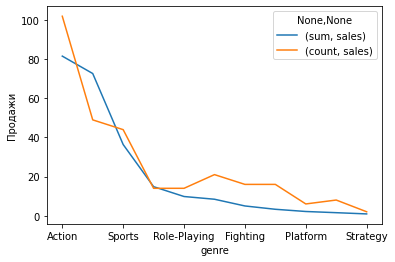

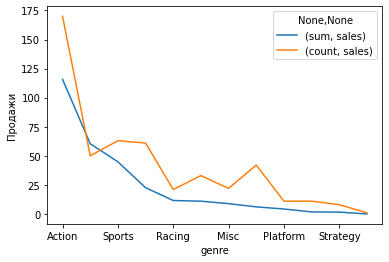

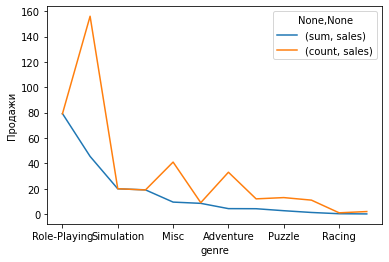

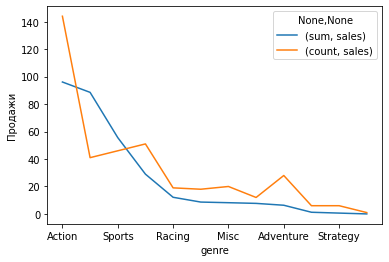

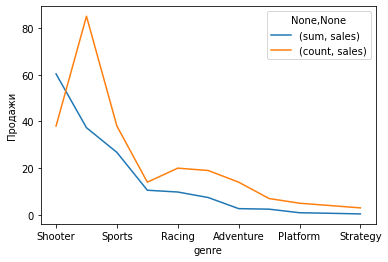

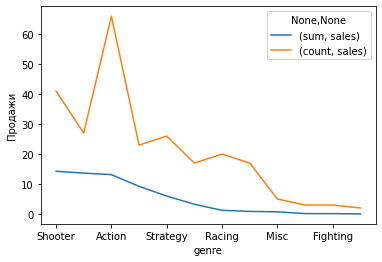

In [36]:
def pivot_genre_sum_count(data):
    data_sum = data.pivot_table(
        index=['genre'], values='sales', aggfunc=['sum','count']).sort_values(by=('sum', 'sales'), ascending = False)
    data_sum.plot( ylabel = 'Продажи')
    print(data['platform'].unique())
    print(data_sum)
    print()
    
    
    
for i in   [df_X360 , df_PS3 ,  df_3DS , df_PS4 , df_XOne, df_PC]:
    pivot_genre_sum_count(i)  


#### Жанры с высшими продажами:  

* Action       
* Shooter   
* Sports         

#### Жанры с низкими продажами:

* Simulation     
* Strategy        
* Puzzle          


,sales
genre,
Shooter,0.470
Sports,0.345
Role-Playing,0.200
Action,0.160
Platform,0.160
Fighting,0.155
Racing,0.135
Misc,0.130
Simulation,0.120


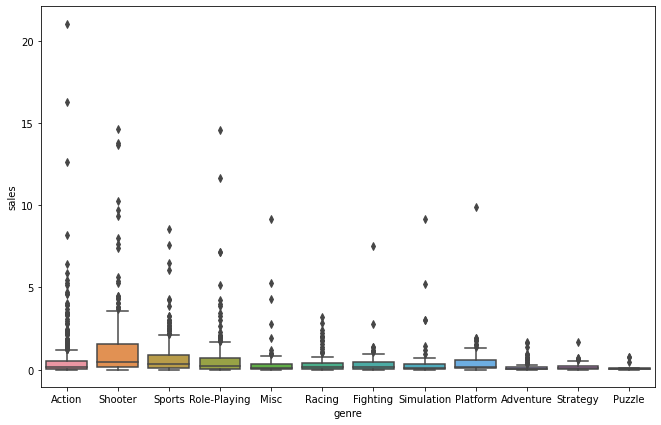

In [37]:
display(df_platform_trend.pivot_table(index=['genre'], values='sales', aggfunc= 'median').sort_values(by='sales', ascending = False))
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.boxplot(data=df_platform_trend, x='genre', y='sales', order=['Action', 'Shooter','Sports','Role-Playing', 'Misc', 'Racing', 'Fighting' , 'Simulation' ,'Platform', 'Adventure', 'Strategy', 'Puzzle'])


(0.0, 1.8)

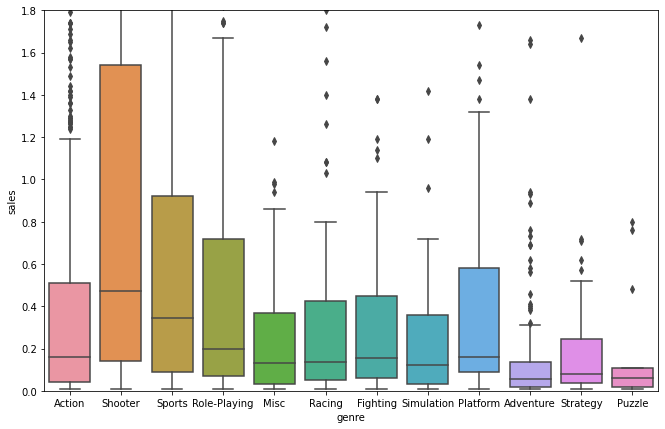

In [38]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.boxplot(data=df_platform_trend, x='genre', y='sales', order=['Action', 'Shooter','Sports','Role-Playing', 'Misc', 'Racing', 'Fighting' , 'Simulation' ,'Platform', 'Adventure', 'Strategy', 'Puzzle'])
plt.ylim(0, 1.8)
 
 

#### Жанры с высшими продажами:
* Shooter
* Sports
* Role-Playing
#### Жанры с низкими продажами:
* Strategy
* Puzzle
* Adventure



### Шаг 4. Составим портрет пользователя каждого региона

* Определим для пользователя каждого региона (NA, EU, JP) Самые популярные платформы (топ-5)


In [39]:

df_pivot_na_user = df_top_platform_year.pivot_table(
    index=['platform'] , values=['na_sales'], aggfunc=['sum']).sort_values(by=('sum', 'na_sales'), ascending = False)
df_pivot_eu_user = df_top_platform_year.pivot_table(
    index=['platform'] , values=['eu_sales'], aggfunc=['sum']).sort_values(by=('sum', 'eu_sales'), ascending = False)
df_pivot_jp_user = df_top_platform_year.pivot_table(
    index=['platform'] , values=['jp_sales'], aggfunc=['sum']).sort_values(by=('sum', 'jp_sales'), ascending = False)


print(df_pivot_na_user.head(5),
df_pivot_eu_user.head(5),
df_pivot_jp_user.head(5))

              sum
         na_sales
platform         
X360       140.05
PS4        108.74
PS3        103.38
XOne        93.12
3DS         55.31               sum
         eu_sales
platform         
PS4        141.09
PS3        106.86
X360        74.52
XOne        51.59
3DS         42.64               sum
         jp_sales
platform         
3DS         87.79
PS3         35.29
PS4         15.96
PSP         10.47
DS           3.72


In [40]:
top_platform_na = df_pivot_na_user.head(5).index
df_pivot_na_user = df_pivot_na_user.reset_index(drop=False)
df_pivot_na_user['platform'] = df_pivot_na_user['platform'].where(df_pivot_na_user['platform'].isin(top_platform_na), 'other')
df_pivot_na_user.columns = ['platform', 'na_sales']
df_pivot_na_user=df_pivot_na_user.pivot_table(index=['platform'] , values=['na_sales'], aggfunc=['sum']) 

In [41]:
top_platform_eu = df_pivot_eu_user.head(5).index
df_pivot_eu_user = df_pivot_eu_user.reset_index(drop=False)
df_pivot_eu_user['platform'] = df_pivot_eu_user['platform'].where(df_pivot_eu_user['platform'].isin(top_platform_eu), 'other')
df_pivot_eu_user.columns = ['platform', 'eu_sales']
df_pivot_eu_user=df_pivot_eu_user.pivot_table(index=['platform'] , values=['eu_sales'], aggfunc=['sum']) 

In [42]:
top_platform_jp = df_pivot_jp_user.head(5).index
df_pivot_jp_user = df_pivot_jp_user.reset_index(drop=False)
df_pivot_jp_user['platform'] = df_pivot_jp_user['platform'].where(df_pivot_jp_user['platform'].isin(top_platform_jp), 'other')
df_pivot_jp_user.columns = ['platform', 'jp_sales']
df_pivot_jp_user=df_pivot_jp_user.pivot_table(index=['platform'] , values=['jp_sales'], aggfunc=['sum']) 


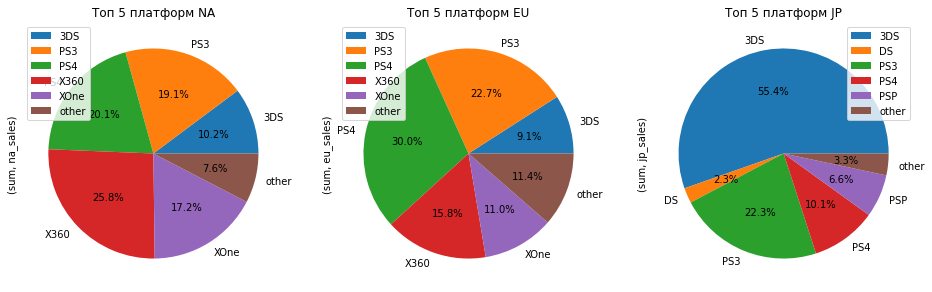

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 5))
df_pivot_na_user.plot(kind = 'pie', ax= ax1, subplots=True,  autopct='%1.1f%%')
ax1.set_title('Топ 5 платформ NA')
df_pivot_eu_user.plot(kind = 'pie', ax= ax2, subplots=True,  autopct='%1.1f%%')
ax2.set_title('Топ 5 платформ EU')
df_pivot_jp_user.plot(kind = 'pie', ax= ax3, subplots=True,  autopct='%1.1f%%')
ax3.set_title('Топ 5 платформ JP')
plt.show()


В разных регионах разные по популярности платформы. 
Так например платформа  3DS, в Европе и Северной Амереке занимает 5 место, а в Японии первое, при этом см большим перевесом

***Определим для пользователя каждого региона (NA, EU, JP) Самые популярные жанры (топ-5)***

In [44]:
df_pivot_na_user_ga = df_top_platform_year.pivot_table(index=['genre'] , values=['na_sales'], aggfunc=['sum']).sort_values(by=('sum', 'na_sales'), ascending = False)
df_pivot_eu_user_ga = df_top_platform_year.pivot_table(index=['genre'] , values=['eu_sales'], aggfunc=['sum']).sort_values(by=('sum', 'eu_sales'), ascending = False)
df_pivot_jp_user_ga = df_top_platform_year.pivot_table(index=['genre'] , values=['jp_sales'], aggfunc=['sum']).sort_values(by=('sum', 'jp_sales'), ascending = False)

print(df_pivot_na_user_ga.head(5),
df_pivot_eu_user_ga.head(5),
df_pivot_jp_user_ga.head(5))
na_genre_top = df_pivot_na_user_ga.head(5).index
eu_genre_top = df_pivot_eu_user_ga.head(5).index
jp_genre_top = df_pivot_jp_user_ga.head(5).index



                  sum
             na_sales
genre                
Action         164.68
Shooter        141.48
Sports          79.07
Role-Playing    60.81
Misc            32.05                   sum
             eu_sales
genre                
Action         148.45
Shooter        110.89
Sports          67.13
Role-Playing    46.48
Racing          23.79                   sum
             jp_sales
genre                
Role-Playing    56.87
Action          45.00
Simulation      10.37
Misc             8.12
Fighting         7.77


In [45]:
df_pivot_na_user_ga = df_pivot_na_user_ga.reset_index(drop=False)
df_pivot_na_user_ga['genre'] = df_pivot_na_user_ga['genre'].where(df_pivot_na_user_ga['genre'].isin(na_genre_top), 'other')
df_pivot_na_user_ga.columns = ['genre', 'na_sales']
df_pivot_na_user_ga=df_pivot_na_user_ga.pivot_table(index=['genre'] , values=['na_sales'], aggfunc=['sum']) 

In [46]:
df_pivot_eu_user_ga = df_pivot_eu_user_ga.reset_index(drop=False)
df_pivot_eu_user_ga['genre'] = df_pivot_eu_user_ga['genre'].where(df_pivot_eu_user_ga['genre'].isin(eu_genre_top), 'other')
df_pivot_eu_user_ga.columns = ['genre', 'eu_sales']
df_pivot_eu_user_ga=df_pivot_eu_user_ga.pivot_table(index=['genre'] , values=['eu_sales'], aggfunc=['sum']) 

In [47]:
df_pivot_jp_user_ga = df_pivot_jp_user_ga.reset_index(drop=False)
df_pivot_jp_user_ga['genre'] = df_pivot_jp_user_ga['genre'].where(df_pivot_jp_user_ga['genre'].isin(jp_genre_top), 'other')
df_pivot_jp_user_ga.columns = ['genre', 'jp_sales']
df_pivot_jp_user_ga=df_pivot_jp_user_ga.pivot_table(index=['genre'] , values=['jp_sales'], aggfunc=['sum']) 

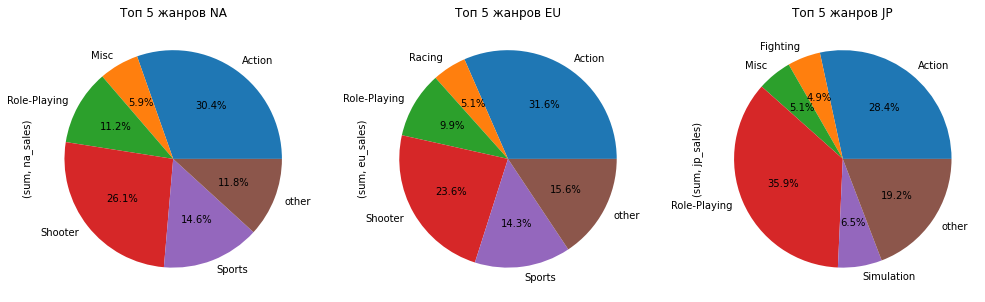

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (17, 5))
df_pivot_na_user_ga.plot(kind = 'pie', legend=False, ax= ax1, subplots=True,  autopct='%1.1f%%')
ax1.set_title('Топ 5 жанров NA')
df_pivot_eu_user_ga.plot(kind = 'pie', ax= ax2, legend=False, subplots=True,  autopct='%1.1f%%')
ax2.set_title('Топ 5 жанров EU')
df_pivot_jp_user_ga.plot(kind = 'pie', ax= ax3, legend=False, subplots=True,  autopct='%1.1f%%')
ax3.set_title('Топ 5 жанров JP')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

В северной Амереке и в Европе первые 4 позиции по популярности  совпадают Action, Shooter, Sports, Role-Playing. В Европе на 5 месте Racing, а в Северной Европе  Misc  
В Японии другие популярные жанры Role-Playing, Action, Simulation, Misc, Fighting 

 Рассмотрим зависимость от рейтинга от организации ESRB.
 
 

In [49]:
df_pivot_na_user_r = df_top_platform_year.query('genre in @na_genre_top').pivot_table(index=['rating'] , values=['na_sales'], aggfunc=['count']).sort_values(by=('count', 'na_sales'), ascending = False)
df_pivot_eu_user_r = df_top_platform_year.query('genre in @eu_genre_top').pivot_table(index=['rating'] , values=['eu_sales'], aggfunc=['count']).sort_values(by=('count', 'eu_sales'), ascending = False)
df_pivot_jp_user_r = df_top_platform_year.query('genre in @jp_genre_top').pivot_table(index=['rating'] , values=['jp_sales'], aggfunc=['count']).sort_values(by=('count', 'jp_sales'), ascending = False)
print(df_pivot_na_user_r.head(5),
df_pivot_eu_user_r.head(5),
df_pivot_jp_user_r.head(5))

          count
       na_sales
rating         
RP          666
M           411
E           232
T           229
E10+        171           count
       eu_sales
rating         
RP          604
M           410
E           273
T           225
E10+        152           count
       jp_sales
rating         
RP          651
M           271
T           246
E10+        147
E           100


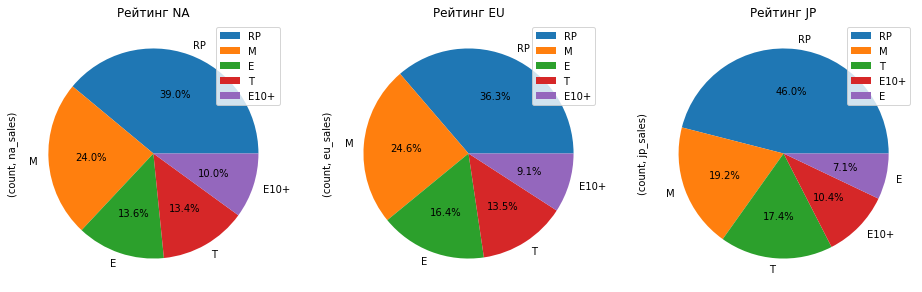

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 5))
df_pivot_na_user_r.head(5).plot(kind = 'pie', ax= ax1, subplots=True,  autopct='%1.1f%%')
ax1.set_title('Рейтинг NA')
df_pivot_eu_user_r.head(5).plot(kind = 'pie', ax= ax2, subplots=True,  autopct='%1.1f%%')
ax2.set_title('Рейтинг EU')
df_pivot_jp_user_r.head(5).plot(kind = 'pie', ax= ax3, subplots=True,  autopct='%1.1f%%')
ax3.set_title('Рейтинг JP')
plt.show()

У популярных платформ основные рейтинги:

* «RP» («Rating Pending») — «Рейтинг ожидается» (заполняли пропуски)
* «M» («Mature») — «Для взрослых»
* «T» («Teen») — «Подросткам»
* «E10+» («Everyone 10 and older») от 10 лет 
* «E» («Everyone») — «Для всех»

 В среднем по регионам распределено одинаково.   


# Шаг 5. Проверка гипотез 


## Гипотеза 1
Нулевая гипотеза

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Альтернативная гипотеза

**Средние пользовательские рейтинги платформ Xbox One и PC  различаются**


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [51]:
sample_1 = df_top_platform_year[df_top_platform_year['platform'] == 'XOne']
sample_1 = sample_1[sample_1['user_score'].isna() == False]['user_score']

sample_2 = df_top_platform_year[df_top_platform_year['platform'] == 'PC']
sample_2 = sample_2[sample_2['user_score'].isna() == False]['user_score']

alpha = 0.01 

results = st.ttest_ind(sample_1, sample_2) 
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


***Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые***


## Гипотеза 2
Нулевая гипотеза

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые**

Альтернативная гипотеза

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**


In [52]:
sample_3 = df_top_platform_year[df_top_platform_year['genre'] == 'Action']
sample_3 = sample_3[sample_3['user_score'].isna() == False]['user_score']

sample_4 = df_top_platform_year[df_top_platform_year['genre'] == 'Sports']
sample_4 = sample_4[sample_4['user_score'].isna() == False]['user_score']

alpha = 0.01 

results = st.ttest_ind(sample_3, sample_4) 
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.90825140036035e-23
Отвергаем нулевую гипотезу


***ВЫвод: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные***

# Шаг 6. Общий вывод 

Выводы:
В среднем платформы живут 10 -15 лет. На время исследования большенство платформ либо уже не использовались, либо их популярность шла на спад. Песпективные платформы на  время исследования PS4 и XOne, которые только начали набирать популярность.
При планировании рекламных акций необходимо учесть:
1. Регион
2. Платформу
3. Жанр 
4. Рейтинг игры 
5. Отзыввы критиков


Согласно полученным выше данным, если ставить ставку на один вид игр во всех регионах, на ближайшие года будут популярны игры на PS4  в жанре Action с рейтингом «M» («Mature») — «Для взрослых» и хорошими отзывами критиков. 

Если в разбивке по регионам, то  PS4  в Северной Амереке и Европе занимают 3 и 1 место, а XOne 4 место. 

В северной Амереке и в Европе первые 4 позиции по популярности совпадают Action, Shooter, Sports, Role-Playing. В Европе на 5 месте Racing, а в Северной Европе Misc

В Японии другие популярные жанры Role-Playing, Action, Simulation, Misc, Fighting

Во всех регионах,если рейтинг определен, то наиболее популярны игры для взрослых. 
